#DATASCI W261: Machine Learning at Scale

**Angela Gunn &  Jing Xu **  
**angela@egunn.com **  
**jaling@gmail.com **  

**MIDS - W261 - Section 3**  
**February 24, 2016**  
**Assignment : Week 6**


----
## HW6.0. 
In mathematics, computer science, economics, or management science what is mathematical optimization? Give an example of a optimization problem that you have worked with directly or that your organization has worked on. Please describe the objective function and the decision variables. Was the project successful (deployed in the real world)? Describe.



**Mathematical Optimization**  
In mathematics, computer science and economics, mathematical optimization is the selection of a best element with regard to some criteria from some set of available alternatives. An optimization problem consists of maximizing or minimizing an objective function by choosing input values from an allowed set and computing the value of the function.  

**Railway**
Railways operate by sharing track and cars. Often it is the case that a customer's shipment must go by multiple carriers to reach its destination. Negotiations then must happen to determine what part of the fees each railway will collect.  There is a central service that coordinates this, but it is up to each railway to approve/dispute the split. Most railways have systems that automatically approve/dispute based on different criteria, or sends it to an adjudicator if it cannot be decided.  I was tasked to determine if the current criteria was optimal - in this case it meant haveing the least amount of loss, but also ensuring that the work sent to adjudicators is minimized (less human intervention). This was a matter of deciding thresholds for each attribute.  For example, if the railway thinks it should get $x for the shipment, but the notice says it should get less, how much less is "tolerable" before sending it to an adjudicator?  Some notices suggest we should get more than what we think we should. In that case, it is easy to say the error in our favor is acceptable, but in good faith we should still dispute it.  So it is a balance of different situations to end up with a positive balance, adjusting the acceptable thresholds (inputs) so to maximize profits, minimize expenses, and be in good faith with all carriers.

----
## HW6.1 
**Optimization theory: **  
**For unconstrained univariate optimization what are the first order  Necessary Conditions for Optimality (FOC).  What are the second order optimality conditions (SOC)? Give a mathematical defintion. Also in python, plot the univartiate function **  
> **x^3 -12x^2-6**   

**defined over the real  domain -6 to +6. **  

**Also plot its corresponding first and second derivative functions. Eyeballing these graphs, identify candidate optimal points and then classify them as local minimums or maximums. Highlight and label these points in your graphs. Justify your responses using the FOC and SOC.**  

### Response:
For univariate optimization problem  with  no  constraints with $f(x)$ as objective function, at a point x\* in the domain of *f* where a minimum occurs, the following are true

- **First Order Condition:** For a point to be maximum or minimum, necessary condition is to have a zero value for the gradient function (first derivative) at the point. $$ \frac{\partial f(x*)}{\partial x} = 0 $$

- **Second Order Condition:** If a point has a value of 0 at the first derivative, and a negative value at the second derivative function, then it is a local maximum. or if a positive value at the second derivative function, then it is a local minimum. 
    
    If x\* is a local maximum, $$ \frac{\partial f^2(x*)}{\partial x^2} < 0 $$
    If x\* is a local minimum, $$ \frac{\partial f^2(x*)}{\partial x^2} > 0 $$
    
For the given univariate objective function $f(x)$, following are the firt order and second order derivative functions <br>

**Objective function:** $ f(x) = x^3 − 12x^2 − 6 $ <br>
**First Order:** $ f′(x) = 3x^2 − 24x $ <br>
**Second Order:** $ f″(x) = 6x − 24 $ <br>

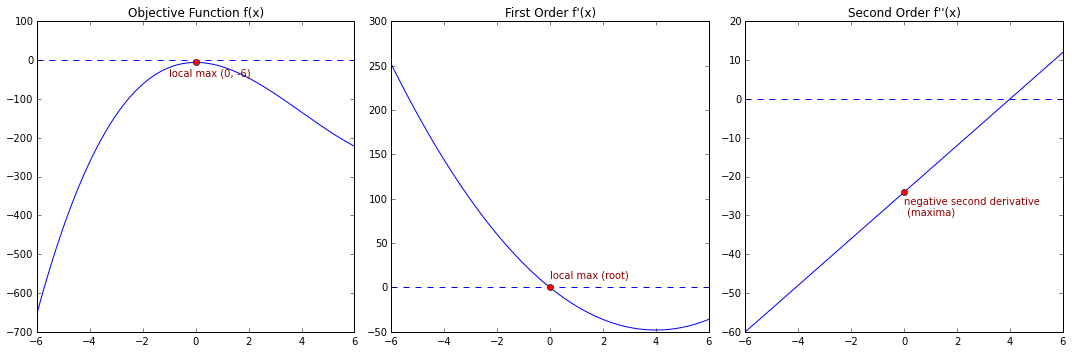

In [1]:
# making matplotlib plots inline
%matplotlib inline

import numpy as np  
import matplotlib.pyplot as plt 

plt.figure(figsize=(15, 5))

# objective function
ax = plt.subplot(131)
X = np.linspace(-6, 6, 100)
y = [(x**3 - 12*x**2 - 6) for x in X]
line = plt.plot(X, y)
ax.set_title("Objective Function f(x)")
# annotation
plt.axhline(y=0.,  ls='dashed')
plt.annotate(
    'local max (0, -6)', 
    xy = (0, -6), 
    xytext = (-1, -40),
    color = "darkred"
)
plt.plot(0,-6,'o',color='r')

# first order derivative
ax = plt.subplot(132)
y = [(3*x**2 - 24*x) for x in X]
line = plt.plot(X, y)
ax.set_title("First Order f'(x)")
plt.axhline(y=0.,  ls='dashed')
plt.plot(0,0,'o',color='r')
plt.annotate(
    'local max (root)', 
    xy = (0, -6), 
    xytext = (0, 10), 
    color = "darkred"
)

# second order derivative
ax = plt.subplot(133)
y = [(6*x - 24) for x in X]
line = plt.plot(X, y)
ax.set_title("Second Order f''(x)")
plt.axhline(y=0., ls='dashed')
plt.plot(0,-24,'o',color='r')
plt.annotate(
    'negative second derivative\n (maxima)', 
    xy = (0, -24), 
    xytext = (0, -30), 
    color = "darkred"
)

plt.tight_layout()
plt.show()

From the graphs, it appears we have local maximum at (x, y) = (0, -6)

- Necessary condition for FOC for optimality suggests minimum/maxiumum point when $f'(x=x∗) = 0$. As per the plot, f′(x) = 0 at x = 0 (i.e. root). 

- Sufficient condition SOC declares candidate point x\* as optimal 
    - Maximum when $f''(x = x∗) < 0 $
    - Minimum when $f''(x = x∗) > 0 $ 
  
  In the second order plot, $ f''(0) < 0 $ confirming a local maximum at x = 0.

-----
## HW6.2
Taking x=1 as the first approximation(xt1) of a root of X^3 + 2x -4 = 0, use the Newton-Raphson method to calculate the second approximation (denoted as xt2) of this root. (Hint the solution is xt2=1.2)


### Just some notes to remind me what I am trying to do:
In Newton-Raphson method, gradient function is approximated by tangent slope at an arbitrary point (here starting with x = 1).

$$ f(x) = x^3 + 2x -4 $$
$$ f'(x) = 3x^2 + 2 $$

Pluggin $x = 1$ into objective function 

$$ f(x) = x^3 + 2x -4 $$
$$ f(1) = 1^3 + 2 -4 = -1 $$

Calculating tangent slope

$$ f'(x) = 3x^2 + 2 $$
$$ f'(1) = 3 + 2 = 5 $$

Plugging in the point and slope into a linear equation (second order derivative)

$$ y = mx + b $$
$$ -1 = 5*1 + b $$
$$ b = -6 $$

Solve for $y = 0$ to get x
$$ 0 = 5x - 6 $$
$$ x = 1.2 $$

Putting this into python code below
$$ x_{t2} = x_{t1} - \frac{f(x_{t1})}{f'(x_{t1}) } $$

In [2]:
def f(x):
    #the function
    return x**3+2*x-4

def f1(x):
    #the derivative of the function
    return 3*x**2+2

def newton_raphson(f, f1, x0, max_iter = 1000):
    #f is the function, f1 is the derivative, x0 is the 
    x_t1 = x0
    THRESHOLD = 0.001 

    while True:  #this will continue until we return somethig; either because we reach threshold or reach max iterations
        x = x_t1 - 1.0*f(x_t1)/f1(x_t1)
        max_iter -= 1
        if abs(x - x_t1) < THRESHOLD or max_iter <= 0:
            return x
        else:
            x_t1 = x

#per assignment question, only iterating for 1 round.
print newton_raphson(f, f1, 1.0,1)

1.2


----
## HW6.3 Convex optimization 
**What makes an optimization problem convex? What are the first order Necessary Conditions for Optimality in convex optimization.  What are the second order optimality conditions for convex optimization? Are both necessary to determine the maximum or minimum of candidate optimal solutions?**

The optimization function $min_{x} f(x)$ is called a **convex optimization problem** if:
+ The objective function $f$ is convex
+ The functions defining the inequality constraints $f_{i}$ are convex
+ The functions defining the equality constraints $f_{i}$ are affine


**First Order Condition:** The necessary condition for optimality for a given x\* is a global minimum of $f(x)$ if $f'(x) = 0$ i.e. funtion is globally above the tangent at y


<img src=convex3.png>


**Second Order Condition:** The second order optimality conditions are not neessary. The first order condition is sufficient to confirm the global minimum is not a local minimum. This is convenient to machine learning because there is no need to test the second order equation to confirm global minimum after gradient descent. 
For convex optimization problems, only first order condition is needed for optimization.


**Fill in the BLANKS here:**
> **Convex minimization, a subfield of optimization, studies the problem of minimizing <span style="color:firebrick">convex</span> functions over <span style="color:firebrick">convex</span> sets. The <span style="color:firebrick">convexity</span> property can make optimization in some sense "easier" than the general case - for example, any local minimum must be a global minimum.**

----
## HW 6.4
The learning objective function for weighted ordinary least squares (WOLS) (aka weight linear regression) is defined as follows:


$$ 0.5 * \sum\limits_{i} weight_i * (WX_i - y_i)^2 $$

Where training set consists of input variables X ( in vector form) and a target variable y, and W is the vector of coefficients for the linear regression model.

Derive the gradient for this weighted OLS by hand; showing each step and also explaining each step.



Let cost function $J(W)$ be defined as

$$ J(W) = 0.5 * \sum\limits_{i} w_i (WX_i - y_i)^2 $$

Expanding cost function
$$ J(W) = 0.5 * \sum\limits_{i} w_i (W^2X_i^2 + y_i^2 - 2WX_iy_i) $$

Calculating gradient descent
$$ \frac{\partial J(W)}{\partial W} = 0.5 * \sum\limits_{i} w_i (2WX_i^2 - 2X_iy_i) $$

Rearranging terms <br>
$$ \frac{\partial J(W)}{\partial W} = \sum\limits_{i} w_iX_i(WX_i - y_i) $$ 

where $ (WX_i - y_i) $ is error term and $ w_iX_i $ is weighted input i and combined gives the weighted error

----
## HW 6.5
Write a MapReduce job in MRJob to do the training at scale of a weighted OLS model using gradient descent.

Generate one million datapoints just like in the following notebook:  http://nbviewer.ipython.org/urls/dl.dropbox.com/s/kritdm3mo1daolj/MrJobLinearRegressionGD.ipynb

Weight each example as follows: 

> weight(x)= abs(1/x)

Sample 1% of the data in MapReduce and use the sampled dataset to train a (weighted if available in SciKit-Learn) linear regression model locally using  SciKit-Learn (http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Plot the resulting weighted linear regression model versus the original model that you used to generate the data. Comment on your findings.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
size = 1000000
x = np.random.uniform(-4, 4, size)
y = x * 1.0 - 4 + np.random.normal(0,0.5,size)
weight = abs(1/x)
data = zip(y,x,weight)
np.savetxt('LinearRegression.csv',data,delimiter = ",")

In [2]:
print x

[ 0.01077918 -3.7439815  -3.7640009  ...,  0.40674709  3.49041367
  0.49022034]


In [3]:
print y

[-2.93798905 -7.35572093 -7.52959994 ..., -3.30812574  0.35241912
 -3.1457311 ]


In [4]:
print weight

[ 92.77145749   0.26709534   0.26567475 ...,   2.45853022   0.28649899
   2.03989903]


In [7]:
print data[:5]

[(-2.9379890547525425, 0.01077917742259249, 92.771457486548258), (-7.3557209321136883, -3.7439815020977418, 0.26709533672634411), (-7.5295999380039138, -3.7640009011986404, 0.26567475041824551), (-5.179864420667589, -1.2791727003147431, 0.78175527022578573), (-3.1551448894279206, 0.25663531320887767, 3.8965798879988567)]


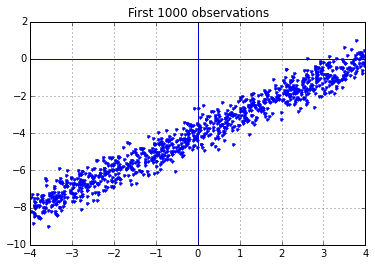

In [2]:
#Plot the data:
plt.plot(x[:1000], y[:1000],'.')
plt.grid(True)
plt.axhline(0)
plt.axvline(0)
plt.title('First 1000 observations')
plt.show()

### Implement MRJob

In [3]:
%%writefile MrJobBatchGDUpdate_LinearRegression.py
from mrjob.job import MRJob
from mrjob.step import MRStep

class MrJobBatchGDUpdate_LinearRegression(MRJob):
    
    def initializeWeights(self):
        # run before the mapper processes any input
        # Read in weights
        with open('weights.txt','r') as f:
            self.weights = [float(x) for x in f.readline().split(',')]
        
        # Initialize gradient for this iteration
        self.partialGradient = [0]*len(self.weights)
        self.partialCount = 0
    
    def calculatePartialGradient(self, _, line):
        # multiply by weight in WOLS
        # keep partial sums in memory
        
        # D is one observation of our data
        # The observations are in the form (y, x, weight)
        D = (map(float, line.split(',')))
        y = D[0]
        x = D[1]
        weight = D[2]
        
        # yHat is the predicted value given current weights
        yHat = self.weights[0] + self.weights[1] * x
        
        # Update partial gradient with gradient from D
        self.partialGradient = [self.partialGradient[0] + (y - yHat) * weight,
                                self.partialGradient[1] + (y - yHat) * x * weight]
        self.partialCount += 1

    def emitPartialGradient(self):
        yield None, (self.partialGradient, self.partialCount)

    def gradient_accumulater(self, _, partialGradientRecords):
        # Accumulate partial gradient from mapper and emit total gradient 
        # Output: key = None, Value = gradient vector
        # Initialize totals
        totalGradient = [0]*2
        totalCount = 0

        # Accumulate
        for partialGradient, partialCount in partialGradientRecords:
            totalCount += partialCount
            for i in range(len(totalGradient)):
                totalGradient[i] += partialGradient[i]
        
        # Emit total gradient
        yield None, [x / totalCount for x in totalGradient]
        

    def steps(self):
        return [
                MRStep(mapper_init=self.initializeWeights,
                       mapper=self.calculatePartialGradient,
                       mapper_final=self.emitPartialGradient,
                       reducer=self.gradient_accumulater)
            ]
    
if __name__ == '__main__':
    MrJobBatchGDUpdate_LinearRegression.run()

Overwriting MrJobBatchGDUpdate_LinearRegression.py


### Driver/Execute

In [4]:
from numpy import random,array
from MrJobBatchGDUpdate_LinearRegression import MrJobBatchGDUpdate_LinearRegression

learning_rate = 0.05
stop_criteria = 0.000005

# Generate random values as inital weights
weights = array([random.uniform(-3,3),random.uniform(-3,3)])
# Write the weights to the files
with open('weights.txt', 'w+') as f:
    f.writelines(','.join(str(j) for j in weights))

# create a mrjob instance for batch gradient descent update over all data
mr_job = MrJobBatchGDUpdate_LinearRegression(args=['LinearRegression.csv', '--file', 'weights.txt', '--no-strict-protocol'])

# Update centroids iteratively
i = 0
All_COEF = []
while(1):
    print "iteration ="+str(i)+"  weights [Intercept Slope] =",weights
    if i%10 == 0: All_COEF.append(weights)
    # Save weights from previous iteration
    weights_old = weights
    with mr_job.make_runner() as runner: 
        runner.run()
        # stream_output: get access of the output 
        for line in runner.stream_output():
            # value is the gradient value
            key,value =  mr_job.parse_output_line(line)
            # Update weights
            weights = weights + learning_rate*array(value)
    i = i + 1
    # Write the updated weights to file 
    with open('weights.txt', 'w+') as f:
        f.writelines(','.join(str(j) for j in weights))
    # Stop if weights get converged
    if(sum((weights_old-weights)**2)<stop_criteria):
        break
        
print "Final weights:\n"
print "Intercept: ", weights[0]
print "Slope: ", weights[1]



iteration =0  weights [Intercept Slope] = [-1.33744309  2.07669857]
iteration =1  weights [Intercept Slope] = [-1.77649035  1.96893637]
iteration =2  weights [Intercept Slope] = [-2.14272072  1.87196488]
iteration =3  weights [Intercept Slope] = [-2.44821076  1.78470249]
iteration =4  weights [Intercept Slope] = [-2.70303419  1.70617622]
iteration =5  weights [Intercept Slope] = [-2.91559404  1.63551072]
iteration =6  weights [Intercept Slope] = [-3.09289971  1.57191847]
iteration =7  weights [Intercept Slope] = [-3.24079813  1.51469097]
iteration =8  weights [Intercept Slope] = [-3.36416651  1.46319075]
iteration =9  weights [Intercept Slope] = [-3.46707321  1.41684428]
iteration =10  weights [Intercept Slope] = [-3.55291184  1.3751355 ]
iteration =11  weights [Intercept Slope] = [-3.62451319  1.33760009]
iteration =12  weights [Intercept Slope] = [-3.68423857  1.30382026]
iteration =13  weights [Intercept Slope] = [-3.73405767  1.27342006]
iteration =14  weights [Intercept Slope] = [

###A graph to show the how the iterations progressed

//anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


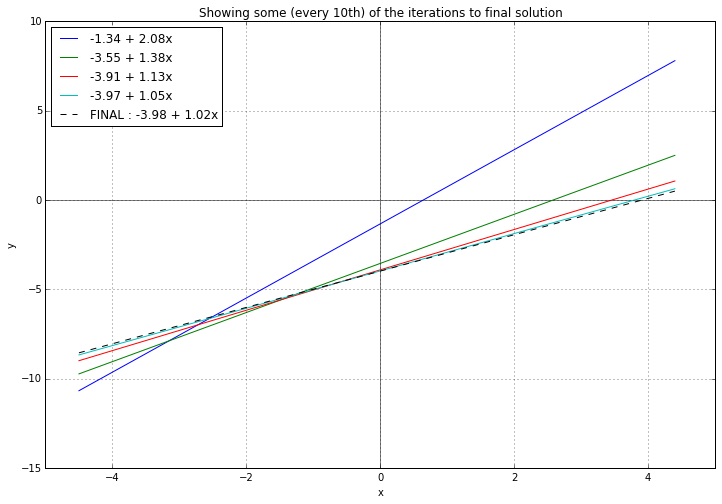

In [5]:
colors = ['b','g','r','c','m','y']

plt.figure(figsize=(12,8))
plt.grid(True)
plt.axhline(0, color='grey')
plt.axvline(0, color='grey')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')


x_values = np.arange(-4.5,4.5,0.1)

cnt = 0
for i, s in All_COEF:
    f = i + s*x_values
    slabel = "{:.2f} + {:.2f}x".format(i,s)
    plt.plot(x_values, f, color = colors[cnt],label=slabel)
    cnt +=1

i,s =  weights
f = i + s*x_values
slabel = "FINAL : {:.2f} + {:.2f}x".format(i,s)
plt.plot(x_values, f, color = "black",  ls='dashed', label=slabel)

    
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.title('Showing some (every 10th) of the iterations to final solution')

plt.show()


Sample 1% of the data in MapReduce and use the sampled dataset to train a (weighted if available in SciKit-Learn) linear regression model locally using SciKit-Learn ()

Plot the resulting weighted linear regression model versus the original model that you used to generate the data. Comment on your findings.

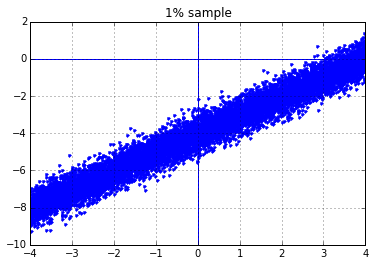

In [19]:
# sample 1% of data
i = np.random.choice(np.arange(1000000), 10000, replace=False)
x_sample = x[i].reshape((10000,1))
y_sample = y[i].reshape((10000,1))
w_sample = weight[i].reshape((10000,1)) #weights
plt.plot(x_sample, y_sample,'.')
plt.grid(True)
plt.axhline(0)
plt.axvline(0)
plt.title('1% sample')
plt.show()


In [23]:
print x_sample[0]
print y_sample[0]
print w_sample[0]

[-1.60182196]
[-5.54578886]
[ 0.62428911]


###Using sklearn to do the Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression

#Fit the data:
lr = LinearRegression()
lr.fit(x_sample, y_sample, w_sample)


print "Intercept: {}".format(lr.intercept_[0])
print "Slope: {}".format(lr.coef_[0][0])

Intercept: -4.00214142387
Slope: 0.997016313985


//anaconda/lib/python2.7/site-packages/sklearn/linear_model/base.py:430: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  sample_weight = column_or_1d(sample_weight, warn=True)
//anaconda/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


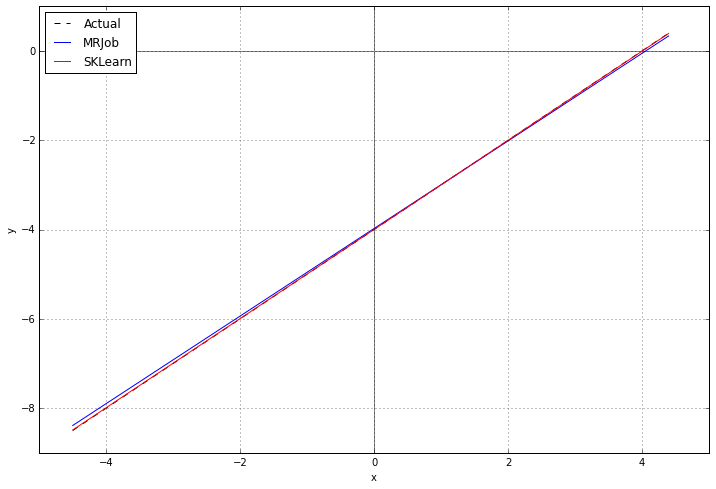

In [20]:
#collect values for plotting
x_values = np.arange(-4.5,4.5,0.1)
y_true = -4 + x_values  # the true values
y_mrjob = weights[0] + weights[1] * x_values  #from our MRJob run
y_sklearn = lr.intercept_[0] + lr.coef_[0][0] * x_values #from sklearn

plt.figure(figsize=(12,8))
plt.grid(True)
plt.axhline(0, color='grey')
plt.axvline(0, color='grey')

trueFunction = plt.plot(x_values, y_true, color='black', ls='dashed', label='Actual')
MRJobFunction = plt.plot(x_values, y_mrjob, color='blue', label='MRJob')
SKLearnFunction = plt.plot(x_values, y_sklearn, color='red', label='SKLearn')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')

####OBSERVATIONS
You can only barely make out the "Actual" line, and only because it is shown as a dash.
The SKLearn did a better job of matching it.
The MRJob implementation is fairly close, but as |x| grows, the error will become larger.

----
##HW6.5.1 (Optional)
Using MRJob and in Python, plot the error surface for the weighted linear regression model using a heatmap and contour plot. 
Also plot the current model in the original domain space.  (Plot them side by side if possible)
Plot the path to convergence (during training) for the weighted linear regression model in plot error space and in the original domain space. Make sure to label your plots with iteration numbers, function, model space versus original domain space, etc.
Comment on convergence and on the mean squared error using your weighted OLS algorithm on the weighted dataset versus using the weighted OLS algorithm on the uniformly weighted dataset.

---
##HW6.6 Clean up notebook for GMM via EM

Using the following notebook as a starting point:

http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/0t7985e40fovlkw/EM-GMM-MapReduce%20Design%201.ipynb 

Improve this notebook as follows:
-- Add in equations into the notebook (not images of equations) 
-- Number the equations
-- Make sure the equation notation matches the code and the code and comments refer to the equations numbers
-- Comment the code
-- Rename/Reorganize the code to make it more readable
-- Rerun the examples similar graphics (or possibly better graphics)

Link to new version:
https://github.com/anggunn/W261/blob/master/Week06/MIDS-W261-2016-HWK-Week06-GMM-Gunn-Xu.ipynb

----
##HW6.7 Implement Bernoulli Mixture Model via EM
Implement the EM clustering algorithm to determine Bernoulli Mixture Model for discrete data in MRJob.

**As a unit test:** use the dataset in the following slides:

https://www.dropbox.com/s/maoj9jidxj1xf5l/MIDS-Live-Lecture-06-EM-Bernouilli-MM-Systems-Test.pdf?dl=0

Cross-check that you get the same cluster assignments and cluster Bernouilli models as presented in the slides after 25 iterations. Dont forget the smoothing.

**As a test:** use the same dataset from HW 4.5, the Tweet Dataset. 
Using this data, you will implement a 1000-dimensional EM-based Bernoulli Mixture Model  algorithm in MrJob on the users by their 1000-dimensional word stripes/vectors using K = 4.  Repeat this experiment using your KMeans MRJob implementation fron HW4.  
Report the rand index score using the class code as ground truth label for both algorithms and comment on your findings.

Here is some more information on the Tweet Dataset.

Here you will use a different dataset consisting of word-frequency distributions for 1,000 Twitter users. These Twitter users use language in very different ways, and were classified by hand according to the criteria:

> 0: Human, where only basic human-human communication is observed.
> 
> 1: Cyborg, where language is primarily borrowed from other sources
(e.g., jobs listings, classifieds postings, advertisements, etc...).

> 2: Robot, where language is formulaically derived from unrelated sources
(e.g., weather/seismology, police/fire event logs, etc...).

> 3: Spammer, where language is replicated to high multiplicity
(e.g., celebrity obsessions, personal promotion, etc... )

Check out the preprints of  recent research,
which spawned this dataset:

> http://arxiv.org/abs/1505.04342
> http://arxiv.org/abs/1508.01843

The main data lie in the accompanying file:

> topUsers_Apr-Jul_2014_1000-words.txt

and are of the form:

> USERID,CODE,TOTAL,WORD1_COUNT,WORD2_COUNT,...
.
.

where

> USERID = unique user identifier
> CODE = 0/1/2/3 class code
> TOTAL = sum of the word counts

Using this data, you will implement a 1000-dimensional K-means algorithm in MrJob on the users
by their 1000-dimensional word stripes/vectors using several 
centroid initializations and values of K.

In [8]:
with open("unit_test_docs.txt","w") as f:
    f.write("1\thot chocolate cocoa beans\n")
    f.write("2\tcocoa ghana africa\n")
    f.write("3\tbeans harvest ghana\n")
    f.write("4\tcocoa butter\n")
    f.write("5\tbutter truffles\n")
    f.write("6\tsweet chocolate\n")
    f.write("7\tsweet sugar\n")
    f.write("8\tsugar cane brazil\n")
    f.write("9\tsweet sugar beet\n")
    f.write("10\tsweet cake icing\n")
    f.write("11\tcake black forest")
    

In [9]:
!cat unit_test_docs.txt

1	hot chocolate cocoa beans
2	cocoa ghana africa
3	beans harvest ghana
4	cocoa butter
5	butter truffles
6	sweet chocolate
7	sweet sugar
8	sugar cane brazil
9	sweet sugar beet
10	sweet cake icing
11	cake black forest

In [10]:
%%writefile mr_BMM_Init.py
from mrjob.job import MRJob
from mrjob.step import MRStep

from numpy import mat, zeros, shape, random, array, zeros_like, dot, linalg
from random import sample
import json
from math import pi, sqrt, exp, pow


class BMM_Init(MRJob):
    DEFAULT_PROTOCOL = 'json'
    
    def steps(self):
        return [
                MRStep(mapper_init = self.mapper_init,
                        mapper=self.mapper,
                       mapper_final = self.mapper_final,
                       reducer=self.reducer),
                MRStep(mapper = self.mapper_vocabulary,
                       reducer=self.reducer_vocabulary,
                      reducer_final = self.reducer_vocabulary_final)
            ]

    
    def __init__(self, *args, **kwargs):
        #call base init method
        super(BMM_Init, self).__init__(*args, **kwargs)
        
        #self.numMappers = 1     #number of mappers
        self.count = 0
        self.qmk = {}
        self.qmk_word = ""
        self.key_docs = {}
        
                                                 
    def configure_options(self):
        #call base configure_options method
        super(BMM_Init, self).configure_options()
        
        self.add_passthrough_option(
            '--k', dest='k', default=2, type='int',
            help='k: number of densities in mixture')
        self.add_passthrough_option(
            '--pathName', dest='pathName', default="", type='str',
            help='pathName: pathname where WordResults.txt is stored')
    
    def mapper_init(self):
        self.doc_list = []
        
    def mapper(self, _, values):
        values = values.split("\t")
        doc = values[0].strip()
        words = values[1].split()
        self.doc_list.append(doc)
        yield doc, words
            
    def mapper_final(self):
        #pick the seeds
        #self.index = sample(range(len(self.doc_list)), self.options.k)
        self.index = [6-1,7-1] #force docs 6, 7 for testing
        print "seed documents = ", self.index
        k = 1
        for i in self.index:
            yield "*"+self.doc_list[i], k
            k+=1
     
    def reducer(self, doc_id, words):        
        #we are receiving exactly what the mapper got
        #we have self.key_docs 
        #we need to build our vocabulary based on the key documents.
        
        words = list(words)
        
        if doc_id[0] == "*": #seed - these will come first.
            self.key_docs[doc_id[1:]] = words[0]
        else:
            for w in words[0]:
                k = self.key_docs.get(doc_id, "*") #see if doc is in our key docs; if not return *
                yield [w,k], 1  #[word, k], 1  where k will be the cluster or *

        
    def mapper_vocabulary(self, wk, value):
        yield wk, value
        
    def reducer_vocabulary(self, wk, value):
        
        word,k = wk
        
        #reducer_vocabulary input ['black', 2] [1];  2 could be * if no k
        
        if self.qmk_word != word:  
            #process old word
            if len(self.qmk_word) == 0: #do alphaself.qmk = {}
                for i in range(1,self.options.k+1):
                    self.qmk_word = "*alpha"
                    self.qmk = {}
                    for i in range(1,self.options.k+1):
                        self.qmk[i] = 1.0/self.options.k
            
                #output to file (append)
                outputList =  str(self.qmk_word) + "\t"+ str(self.qmk)
                #print outputList

                fullPath = self.options.pathName + 'AlphaResults.txt'
                fileOut = open(fullPath,'a')
                fileOut.write(str(outputList)+"\n")
                fileOut.close()
            else:
                #output to file (append)
                outputList =  str(self.qmk_word) + "\t"+ str(self.qmk)
                #print outputList

                fullPath = self.options.pathName + 'WordResults.txt'
                fileOut = open(fullPath,'a')
                fileOut.write(str(outputList)+"\n")
                fileOut.close()

            #initialize for new word
            self.qmk_word = word
            self.qmk = {}
            for i in range(1,self.options.k+1):
                self.qmk[i] = 0
            if k != "*": self.qmk[k]=list(value)[0]
           
        else:  #same word
            if k != "*": self.qmk[k] = list(value)[0]
            
    def reducer_vocabulary_final(self):
        #emit last word
        outputList =  str(self.qmk_word) + "\t"+ str(self.qmk)
        fullPath = self.options.pathName + 'WordResults.txt'
        fileOut = open(fullPath,'a')
        fileOut.write(str(outputList))
        fileOut.close()

if __name__ == '__main__':
    BMM_Init.run()

Writing mr_BMM_Init.py


In [11]:
%%writefile mr_BMM_Expectation.py
from mrjob.job import MRJob
from mrjob.step import MRStep
from numpy import mat, zeros, shape, random, array, zeros_like, dot, linalg
from random import sample
import json
import ast
from math import pi, sqrt, exp, pow

class BMM_Expectation(MRJob):
    DEFAULT_PROTOCOL = 'json'
        
    def __init__(self, *args, **kwargs):
        #call base init method
        super(BMM_Expectation, self).__init__(*args, **kwargs)
        
        fullPath = self.options.pathName + 'WordResults.txt'
        
        self.alpha = {}
        self.q_mk = {}
        
        self.current_doc=""
        self.current_in = {}
        self.current_out = {}
        
        #build word dictionary.  Not scalable, but will do.
        with open(fullPath, "r") as f:
            for line in f:
                line = line.replace("]","").replace("[","")
                line = line.strip()
                line = line.replace("'","")
                
                
                word, dic = line.split("\t")
                
                word = word.replace("'","").strip()
                dic = ast.literal_eval(dic)
                self.q_mk[word] = dic
                
        #build alpha        
        fullPath = self.options.pathName + "AlphaResults.txt" 
    
        with open(fullPath, "r") as f:
            for line in f:
                
                line = line.replace("]","").replace("[","")
                line = line.strip()
                line = line.replace("'","")
                
                
                word, dic = line.split("\t")
                
                word = word.replace("'","").strip()
                dic = ast.literal_eval(dic)
                for k,v in dic.iteritems():
                    self.alpha[k]=v
                
        #delete contents of file doc_Results
        fullPath = self.options.pathName + 'doc_results.txt'
        with open(fullPath, "w") as f:
            pass
                
            
                                                 
    def configure_options(self):
        #call base configure_options method
        super(BMM_Expectation, self).configure_options()
        
        self.add_passthrough_option(
            '--k', dest='k', default=2, type='int',
            help='k: number of densities in mixture')
        self.add_passthrough_option(
            '--pathName', dest='pathName', default="", type='str',
            help='pathName: pathname where WordResults.txt is stored')
        
        
    def mapper(self, _, values):
        values = values.split("\t")
        doc = values[0].strip()
        words = values[1].split()
        
        k_tin = {}
        k_tout = {}
        
        
        #for each word in our dic, and then for each k, output a value (O(kw)  where w is |words|)
        for w,qmk in self.q_mk.iteritems():
            if doc in ['10']: print "w, qmk = ",w,qmk
            if sum(qmk.values()) > 0:  #we only want words where we have information

                for k in range(1, self.options.k+1):
                    if doc in ['10']: print "qmk[k]=",k, qmk[k]

                    if w in words:
                        if doc in['10']: print w, [doc, k, 1], float(qmk[k])
                        yield [doc, k, 1], float(qmk[k])
                    else:
                        if doc in['10']: print w, [doc, k, 1], 1-float(qmk[k])
                        yield [doc, k, 0], 1-float(qmk[k])
                    
                    
    
    def reducer(self, key, values):
        value = sum(values)
        doc, k, in_out = key
        
        
        fullPath = self.options.pathName + 'doc_results.txt'
        
        if self.current_doc == doc:
            if in_out == 1:
                self.current_in[k] = value
            else:
                self.current_out[k] = value
        else: #new document
            if doc in['10']: print "reducer output"
            if len(self.current_doc) > 0: #change doc
                #output
                f_k = {}
                sum_all = 0
                for i_k in range(1, self.options.k+1):
                    #set return to -1 if not found.
                    k_in = self.current_in.get(i_k,-1)
                    k_out = self.current_out.get(i_k,-1)
                    if k_in == -1 or k_out == -1:  #if we didn't find something, use alpha
                        if self.current_doc in['10']: print "shouldn't be here"
                        f_k[i_k] = self.alpha[i_k]
                    else:
                        f_k[i_k] = self.alpha[i_k] * self.current_in[i_k] * self.current_out[i_k]
                    sum_all += f_k[i_k] # sum will be used in denominator
                    if self.current_doc in['10']: print "k_in = ", self.current_in[i_k]
                    if self.current_doc in['10']: print "k_out = ",self.current_out[i_k]
                    if self.current_doc in['10']: print "alpha = ", self.alpha[i_k]
                    if self.current_doc in['10']: print "f[k] = ", f_k[i_k]
                    
                #print output
                with open(fullPath, "a") as f:
                    for i_k in range(1,self.options.k+1):
                        out_key = [self.current_doc,i_k]
                        if sum_all == 0:
                            out_val = self.alpha[i_k]
                        else:
                            out_val = f_k[i_k]/sum_all
                        
                        out_string = str(out_key) + "\t" + str(out_val)
                        if self.current_doc in['10']: print "output = ", out_string
                        #print out_string
                        f.write(out_string + "\n")
                
            #reset values
            self.current_doc = doc
            self.current_in = {}
            self.current_out = {}
            if in_out == 1:
                self.current_in[k] = value
            else:
                self.current_out[k] = value
        #end if
        
        
    def reducer_final(self):
        #final output
        fullPath = self.options.pathName + 'doc_results.txt'
        
        f_k = {}
        sum_all = 0
        for i_k in range(1, self.options.k+1):
            f_k[i_k] = self.alpha[i_k] * self.current_in[i_k] * self.current_out[i_k]
            sum_all += f_k[i_k]
        with open(fullPath, "a") as f:
            for i_k in range(1,self.options.k+1):
                out_key = [self.current_doc,i_k]
                out_val = f_k[i_k]
                out_string = str(out_key) + "\t" + str(out_val)
                f.write(out_string +"\n")
  
    
if __name__ == '__main__':
    BMM_Expectation.run()
    

Writing mr_BMM_Expectation.py


In [12]:
%%writefile mr_BMM_Maximization_Alpha.py
from mrjob.job import MRJob
from mrjob.step import MRStep

from numpy import mat, zeros, shape, random, array, zeros_like, dot, linalg
from random import sample
import json

import ast

from math import pi, sqrt, exp, pow


class BMM_Maximization_Alpha(MRJob):
    DEFAULT_PROTOCOL = 'json'
    
    def steps(self):
        return [
                MRStep(mapper_init = self.mapper_init,
                        mapper=self.mapper,
                       mapper_final = self.mapper_final,
                       reducer=self.reducer,
                      reducer_final = self.reducer_final) 
            ]

    
    def __init__(self, *args, **kwargs):
        #call base init method
        super(BMM_Maximization_Alpha, self).__init__(*args, **kwargs)
        
        
        #delete contents of alpha
        fullPath = self.options.pathName + "AlphaResults.txt" 
            
        with open(fullPath,"w") as f:
            pass  #this is to delete contents of file.
                                        
        self.alpha = {}
            
            
                                                 
    def configure_options(self):
        #call base configure_options method
        super(BMM_Maximization_Alpha, self).configure_options()
        
        self.add_passthrough_option(
            '--k', dest='k', default=2, type='int',
            help='k: number of densities in mixture')
        self.add_passthrough_option(
            '--pathName', dest='pathName', default="", type='str',
            help='pathName: pathname where AlphaResults.txt is stored')
        
    def mapper_init(self):
        self.N = []
        
    def mapper(self, _, values):
        values = values.split("\t")
        tokens = values[0].replace("]","").replace("[","")
        tokens = tokens.strip()
        doc,k = tokens.split(",")
        r_nk = float(values[1].strip())
        if doc not in self.N: self.N.append(doc)
        #print k.strip(), r_nk
        yield k.strip(), r_nk
        
    def mapper_final(self):
        #print "mapper_final ", len(self.N)
        yield "*",len(self.N)
        
    def reducer(self, k, r_nk):
        numerator = sum(r_nk)
        #print "reducer in", k, numerator
        
        if k == "*":
            self.N = numerator
        else:  #write alphas
            alpha_k = numerator/self.N
            self.alpha[k] = alpha_k
            
    def reducer_final(self):
        with open(self.options.pathName + 'AlphaResults.txt',"a") as f:
            strOutput = "*alpha\t" + str(self.alpha)
            f.write(strOutput+"\n")


    
if __name__ == '__main__':
    BMM_Maximization_Alpha.run()
    

Writing mr_BMM_Maximization_Alpha.py


In [13]:
%%writefile mr_BMM_Maximization_qmk.py
from mrjob.job import MRJob
from mrjob.step import MRStep

from numpy import mat, zeros, shape, random, array, zeros_like, dot, linalg
from random import sample
import json

import ast

from math import pi, sqrt, exp, pow


class BMM_Maximization_qmk(MRJob):
    DEFAULT_PROTOCOL = 'json'
    


    
    def __init__(self, *args, **kwargs):
        #call base init method
        super(BMM_Maximization_qmk, self).__init__(*args, **kwargs)
        
        fullPath = self.options.pathName + 'WordResults.txt'
        
        self.alpha = {}
        self.q_mk = {}
        self.smoothing = 0.0
        
        self.current_word=""
        self.current_kvals = {}
        
        #delete contents of file WordResults
        with open(fullPath, "w") as f:
            pass
                
        fullPath = self.options.pathName + 'doc_results.txt'
        
        #build doc dictionary.  Not scalable, but will do.       
        self.rdk = {}  # this will look like rdk[dock][k] = value
        self.rdk_sum = {}  #hold sum of all rdk
        for k in range(1, self.options.k+1): self.rdk_sum[k] = 0
        
        with open(fullPath, "r") as f:
            for line in f:
                #cleanup
                line = line.replace("]","").replace("[","")
                line = line.strip()
                line = line.replace("'","")
                tokens, value = line.split("\t")
                doc, k = tokens.split(",")
                doc=doc.strip()
                k=int(k.strip())
                
                k_dic = self.rdk.get(doc, {})  #get the dictionary associated with this doc
                k_dic[k] = float(value)   #add the k value
                
                self.rdk[doc] = k_dic   #put the dictionary back.
                
                self.rdk_sum[k] += float(value)+ self.smoothing


            
                                                 
    def configure_options(self):
        #call base configure_options method
        super(BMM_Maximization_qmk, self).configure_options()
        
        self.add_passthrough_option(
            '--k', dest='k', default=2, type='int',
            help='k: number of densities in mixture')
        self.add_passthrough_option(
            '--pathName', dest='pathName', default="", type='str',
            help='pathName: pathname where WordResults.txt is stored')
        
        
    def mapper(self, _, values):
        #input is the documents
        #emits [word, k], rnk + smoothing
        
        doc, words = values.split("\t")
        doc = doc.strip()
        words = words.split()
        
        
        for k in range (1,self.options.k+1):
            rnk = self.rdk[str(doc)][k]
            for w in words:
                yield [w,k], rnk + self.smoothing
                    
                    
    
    def reducer(self, key, values):
        #receives [word,k], rnks
        rnk_sum = sum(values)
        word, k = key
        
        
        fullPath = self.options.pathName + 'WordResults.txt'
        
        if self.current_word != word: #new word!
            if len(self.current_word) > 0: # do something with old word
                strOutput = self.current_word + "\t" + str(self.current_kvals)
                with open(fullPath, "a") as f:
                    f.write(strOutput + "\n")
            #reset values
            self.current_word = word
            self.current_kvals = {}
            self.current_kvals[k] = float(rnk_sum)/self.rdk_sum[k]
        else:
            self.current_kvals[k] = float(rnk_sum)/self.rdk_sum[k]
        

        
        
    def reducer_final(self):
        #final output
        
        fullPath = self.options.pathName + 'WordResults.txt'
        
        if len(self.current_word) > 0: # do something with old word
            strOutput = self.current_word + "\t" + str(self.current_kvals)
            with open(fullPath, "a") as f:
                f.write(strOutput + "\n")
  
    
if __name__ == '__main__':
    BMM_Maximization_qmk.run()
    

Writing mr_BMM_Maximization_qmk.py


In [16]:
from mr_BMM_Init import BMM_Init
from mr_BMM_Expectation import BMM_Expectation
from mr_BMM_Maximization_Alpha import BMM_Maximization_Alpha
from mr_BMM_Maximization_qmk import BMM_Maximization_qmk
import json
from math import sqrt
import matplotlib.pyplot as plt


#first run the initializer to get starting centroids
filePath = 'unit_test_docs.txt'
filePath_alpha = 'doc_results.txt'
!rm WordResults.txt
!rm doc_results.txt
!rm AlphaResults.txt

myPathName = '/Users/JingXu/Dropbox/DataScience/W261/W261/HW6/'
mrJobInit = BMM_Init(args=[filePath, '--pathName', myPathName, '--no-strict-protocol'])

with mrJobInit.make_runner() as runner:
    runner.run()
    
#print "\n***Done Init***"

for i in range(2):
    print "\nIteration ", i+1

    mrJobExpec = BMM_Expectation(args=[filePath, '--pathName', myPathName, '--no-strict-protocol'])

    with mrJobExpec.make_runner() as runner:
        runner.run()

    #print "\n***Done E***"

    mrJobMax_Alpha = BMM_Maximization_Alpha(args=[filePath_alpha, '--pathName', myPathName, '--no-strict-protocol'])

    with mrJobMax_Alpha.make_runner() as runner:
        runner.run()

    #print "\n***Done M_alpha***"

    mrJobMax_qmk = BMM_Maximization_qmk(args=[filePath, '--pathName', myPathName, '--no-strict-protocol'])

    with mrJobMax_qmk.make_runner() as runner:
        runner.run()

    #print "\n***Done M_qmk***"
    
    #print "Doc Probs:"
    #!cat doc_results.txt
    

print "\n***FINISHED***"

seed documents =  [5, 6]

Iteration  1
w, qmk =  brazil {1: 0, 2: 0}
w, qmk =  butter {1: 0, 2: 0}
w, qmk =  truffles {1: 0, 2: 0}
w, qmk =  cane {1: 0, 2: 0}
w, qmk =  icing {1: 0, 2: 0}
w, qmk =  beet {1: 0, 2: 0}
w, qmk =  ghana {1: 0, 2: 0}
w, qmk =  sweet {1: 1, 2: 1}
qmk[k]= 1 1
sweet ['10', 1, 1] 1.0
qmk[k]= 2 1
sweet ['10', 2, 1] 1.0
w, qmk =  africa {1: 0, 2: 0}
w, qmk =  chocolate {1: 1, 2: 0}
qmk[k]= 1 1
chocolate ['10', 1, 1] 0.0
qmk[k]= 2 0
chocolate ['10', 2, 1] 1.0
w, qmk =  cocoa {1: 0, 2: 0}
w, qmk =  hot {1: 0, 2: 0}
w, qmk =  beans {1: 0, 2: 0}
w, qmk =  forest {1: 0, 2: 0}
w, qmk =  cake {1: 0, 2: 0}
w, qmk =  black {1: 0, 2: 0}
w, qmk =  sugar {1: 0, 2: 1}
qmk[k]= 1 0
sugar ['10', 1, 1] 1.0
qmk[k]= 2 1
sugar ['10', 2, 1] 0.0
w, qmk =  harvest {1: 0, 2: 0}
reducer output
k_in =  1.0
k_out =  1.0
alpha =  0.5
f[k] =  0.5
k_in =  1.0
k_out =  1.0
alpha =  0.5
f[k] =  0.5
output =  ['10', 1]	0.5
output =  ['10', 2]	0.5

Iteration  2
w, qmk =  brazil {1: 0.0, 2: 0.16666

In [17]:
!cat WordResults.txt

africa	{1: 0.08973051894882038, 2: 0.03158987413797622}
beans	{1: 0.2183416620703032, 2: 0.04379105654788653}
beet	{1: 0.2609292216115163, 2: 0.6051941350113104}
black	{1: 0.07633728784219407, 2: 0.03826870799660814}
brazil	{1: 0.0, 2: 0.07633600174055998}
butter	{1: 0.16850716074724006, 2: 0.06864214379596965}
cake	{1: 0.141361773510881, 2: 0.08217879749338637}
cane	{1: 0.0, 2: 0.07633600174055998}
chocolate	{1: 0.2158093799921545, 2: 0.04505383557025246}
cocoa	{1: 0.3080442253378614, 2: 0.07539487141077582}
forest	{1: 0.07633728784219407, 2: 0.03826870799660814}
ghana	{1: 0.18196190238681384, 2: 0.061932636336110264}
harvest	{1: 0.09223138343799343, 2: 0.030342762198134046}
hot	{1: 0.12611027863230975, 2: 0.01344829434975248}
icing	{1: 0.06502448566868695, 2: 0.043910089496778236}
sugar	{1: 0.2923597833629107, 2: 0.7421925868042811}
sweet	{1: 0.4470833703914423, 2: 0.7413722157809993}
truffles	{1: 0.07630373299050874, 2: 0.03828544087292254}


africa	{1: 0, 2: 0}
beans	{1: 0, 2: 0}
beet	{1: 0, 2: 0}
black	{1: 0, 2: 0}
brazil	{1: 0, 2: 0}
butter	{1: 0, 2: 0}
cake	{1: 0, 2: 0}
cane	{1: 0, 2: 0}
chocolate	{1: 1, 2: 0}
cocoa	{1: 0, 2: 0}
forest	{1: 0, 2: 0}
ghana	{1: 0, 2: 0}
harvest	{1: 0, 2: 0}
hot	{1: 0, 2: 0}
icing	{1: 0, 2: 0}
sugar	{1: 0, 2: 1}
sweet	{1: 1, 2: 1}
truffles	{1: 0, 2: 0}

In [18]:
!cat AlphaResults.txt

*alpha	{'1': 0.5938724560220909, '2': 1.1909071583033637}


In [19]:
!cat doc_results.txt

['1', 1]	0.823827629911
['1', 2]	0.176172370089
['10', 1]	0.424778761062
['10', 2]	0.575221238938
['11', 1]	0.498680738786
['11', 2]	0.501319261214
['2', 1]	0.586173320351
['2', 2]	0.413826679649
['3', 1]	0.602510460251
['3', 2]	0.397489539749
['4', 1]	0.602327837051
['4', 2]	0.397672162949
['5', 1]	0.498461538462
['5', 2]	0.501538461538
['6', 1]	0.585968081903
['6', 2]	0.414031918097
['7', 1]	0.205323193916
['7', 2]	0.794676806084
['8', 1]	0.0
['8', 2]	1.0
['9', 1]	1.70454545455
['9', 2]	7.92803030303


----
##HW6.8 (Optional) 1 Million songs
Predict the year of the song. Ask Jimi